## loading the datasets

In [2]:
%cd 'AIBL DATA'

/content/drive/MyDrive/freelancing_work/task11_3_supervised&unsupervised/AIBL DATA


In [3]:
import os
file_list = os.listdir('/AIBL DATA')
file_list.remove('before opening read and comply to this.jsp')
file_list.remove('AIBL_outline.docx')
file_list

['aibl_apoeres_01-Jun-2018.csv',
 'aibl_cdr_01-Jun-2018.csv',
 'aibl_labdata_01-Jun-2018.csv',
 'aibl_medhist_01-Jun-2018.csv',
 'aibl_mmse_01-Jun-2018.csv',
 'aibl_neurobat_01-Jun-2018.csv',
 'aibl_pdxconv_01-Jun-2018.csv',
 'aibl_ptdemog_01-Jun-2018.csv',
 'DATADIC(1).csv']

In [49]:
#loading the data
import pandas as pd

data = []
for i in range(8):
  data.append(pd.read_csv(file_list[i]))
  print("\n\n\nSummary of the dataframe: ", file_list[i])
  print(data[i].head())





Summary of the dataframe:  aibl_apoeres_01-Jun-2018.csv
   RID  SITEID VISCODE    APTESTDT  APGEN1  APGEN2
0    2       1      bl  09/16/2011       3       3
1    3       1      bl  10/19/2007       4       3
2    4       1      bl  02/02/2007       3       3
3    5       1      bl  02/05/2007       3       3
4   10       1      bl  02/26/2007       4       4



Summary of the dataframe:  aibl_cdr_01-Jun-2018.csv
   RID  SITEID VISCODE    EXAMDATE  CDGLOBAL
0    2       1      bl  09/16/2011       0.0
1    2       1     m18  04/11/2013       0.0
2    3       1      bl  10/12/2007       0.0
3    3       1     m18  05/29/2009       0.0
4    3       1     m36  10/25/2010       0.0



Summary of the dataframe:  aibl_labdata_01-Jun-2018.csv
   RID  SITEID VISCODE  AXT117   BAT126  HMT3  HMT7  HMT13  HMT40  HMT100  \
0    2       1      bl    1.26  483.867  4.39   5.5  220.0   14.4    32.8   
1    2       1     m18    1.01  397.123  4.56   4.6  190.0   14.9    32.7   
2    3       1      

## merging the dataset on primary key i.e. RID, VISCODE and SITEID

In [50]:
all_data = data[7]
for i in range(7):
  all_data = all_data.merge(data[i], on=['RID','VISCODE', 'SITEID' ], how='left')

In [52]:
all_data

,RID,SITEID,VISCODE,PTGENDER,PTDOB,APTESTDT,APGEN1,APGEN2,EXAMDATE_x,CDGLOBAL,...,MH10GAST,MH12RENA,MH16SMOK,MH17MALI,EXAMDATE_y,MMSCORE,EXAMDATE,LIMMTOTAL,LDELTOTAL,DXCURREN
0,2,1,bl,1,/1941,09/16/2011,3,3,09/16/2011,0.0,...,0,0,-4,0,09/16/2011,30,09/16/2011,16,14,1
1,3,1,bl,2,/1939,10/19/2007,4,3,10/12/2007,0.0,...,1,0,0,0,10/12/2007,30,10/12/2007,9,11,1
2,4,1,bl,2,/1922,02/02/2007,3,3,02/02/2007,0.0,...,0,0,1,0,02/02/2007,27,02/02/2007,9,2,1
3,5,1,bl,1,/1933,02/05/2007,3,3,02/05/2007,0.5,...,0,0,0,0,02/05/2007,30,02/05/2007,10,0,2
4,10,1,bl,1,/1925,02/26/2007,4,4,02/26/2007,1.0,...,0,0,1,0,02/26/2007,21,02/26/2007,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,1632,2,bl,1,/1941,07/11/2014,-4,-4,07/11/2014,0.5,...,1,0,1,0,07/11/2014,27,07/11/2014,6,6,2
858,1634,2,bl,1,/1937,07/15/2014,-4,-4,07/15/2014,-4.0,...,1,0,1,0,07/15/2014,20,07/15/2014,5,4,1
859,1636,2,bl,1,/1948,07/21/2014,-4,-4,07/21/2014,0.5,...,0,0,1,0,07/21/2014,28,07/21/2014,3,3,2
860,1637,2,bl,1,/1947,07/24/2014,-4,-4,07/24/2014,0.5,...,0,0,0,0,07/24/2014,28,07/24/2014,8,12,2


In [7]:
#counting the differnt target values 
all_data['DXCURREN'].value_counts()

 1    609
 2    144
 3    105
 7      3
-4      1
Name: DXCURREN, dtype: int64

In [8]:
all_data = all_data.drop(columns=['RID', 'SITEID', 'VISCODE', 'APTESTDT','EXAMDATE_y','EXAMDATE_x'], axis=1)

In [9]:
#removing the extra-classes i.e. 7 and -4 as we have three classes
indexes_to_be_remove = all_data[all_data['DXCURREN'] == 7 ].index
all_data.drop(indexes_to_be_remove, inplace=True)

indexes_to_be_remove = all_data[all_data['DXCURREN'] == -4 ].index
all_data.drop(indexes_to_be_remove, inplace=True)

In [10]:
'''
as we have to classify the data into two classes i.e. Healthy and Non-Healthy, so the data with the DXCURREN label 0 
is for healthy while the label 1 is for non-healthy
'''
all_data['DXCURREN'][all_data['DXCURREN']==3] = 2
all_data['DXCURREN'][all_data['DXCURREN']==1] = 0
all_data['DXCURREN'][all_data['DXCURREN']==2] = 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [11]:
#counting the differnt target values 
all_data['DXCURREN'].value_counts()

0    609
1    249
Name: DXCURREN, dtype: int64

### creating new column for the age of the patients

In [12]:
#finding the year of date of birth 
DOB = all_data['PTDOB']
DOB = pd.to_datetime(DOB, yearfirst=True)
DOB = DOB.dt.year
all_data['DOB'] = DOB

In [13]:
#finding the examination data
testing_date = all_data['EXAMDATE']
testing_date = pd.to_datetime(testing_date, errors='coerce')
testing_date = testing_date.dt.year
all_data['TESTDATE'] = testing_date


In [14]:
#removing the null values if any
all_data.dropna(inplace=True)

In [15]:
#finding the age for each patient 
all_data['AGE'] = all_data['TESTDATE'] - all_data['DOB']

In [16]:
#droping the extra columns 
all_data.drop(columns=['EXAMDATE', 'DOB', 'TESTDATE', 'PTDOB'] , axis=1, inplace=True)

In [17]:
#summary of the processed data
all_data.head()

,PTGENDER,APGEN1,APGEN2,CDGLOBAL,AXT117,BAT126,HMT3,HMT7,HMT13,HMT40,...,MH9ENDO,MH10GAST,MH12RENA,MH16SMOK,MH17MALI,MMSCORE,LIMMTOTAL,LDELTOTAL,DXCURREN,AGE
0,1,3,3,0.0,1.26,483.867,4.39,5.5,220.0,14.4,...,0,0,0,-4,0,30,16,14,0,70.0
1,2,4,3,0.0,1.31,402.545,3.87,5.2,254.0,12.6,...,0,1,0,0,0,30,9,11,0,68.0
2,2,3,3,0.0,1.33,429.652,4.13,6.8,327.0,13.1,...,0,0,0,1,0,27,9,2,0,85.0
3,1,3,3,0.5,1.37,361.884,5.64,5.7,140.0,16.5,...,1,0,0,0,0,30,10,0,1,74.0
4,1,4,4,1.0,6.99,345.619,4.29,4.8,164.0,15.0,...,0,0,0,1,0,21,3,0,1,82.0


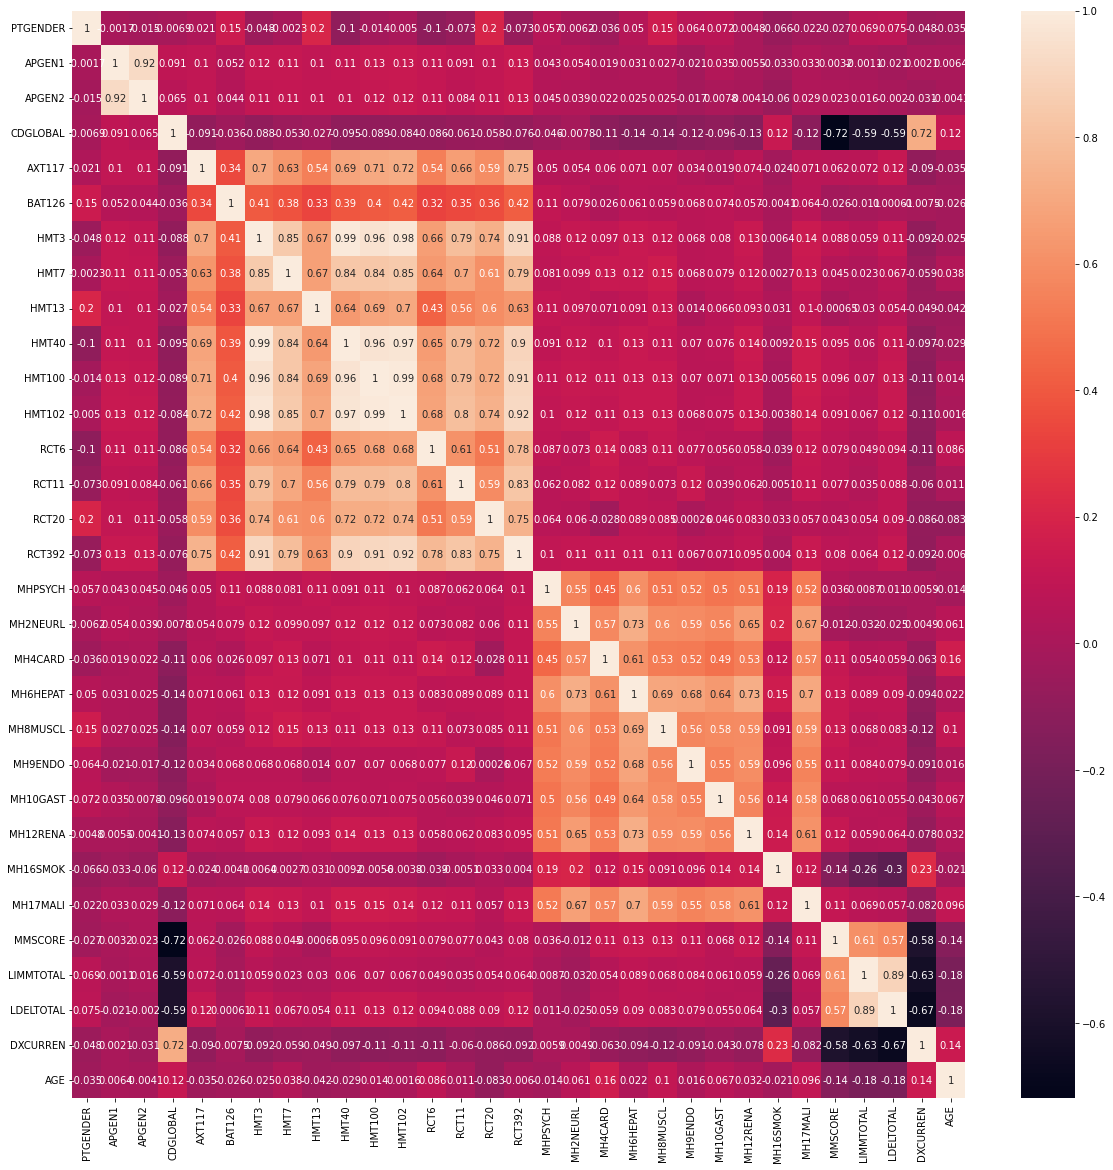

In [18]:
import seaborn as sn
import matplotlib.pyplot as plt


df = pd.DataFrame(all_data,columns=all_data.columns)
plt.rcParams["figure.figsize"] = (20,20)
corrMatrix = df.corr()

sn.heatmap(corrMatrix, annot=True)
plt.show()

## Train, testing data spliting

In [42]:
X = all_data.drop(columns=['DXCURREN'], axis=1)
y =  all_data['DXCURREN']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=20)

# 3 supervised Learning algorithms

### 1) Support vector machine with linear kernel

In [43]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train,  y_train)

SVC(kernel='linear')

In [45]:
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, plot_roc_curve

y_predict = svm_classifier.predict(X_test)
svm_f1_score = f1_score(y_test, y_predict)
target_names = ['Healthy', 'Non-Healthy']
svm_classification_report = classification_report(y_test, y_predict, target_names=target_names)
print("SVM F1_score: ", svm_f1_score)
print("SVM classification report: \n", svm_classification_report)


SVM F1_score:  0.9142857142857144
SVM classification report: 
               precision    recall  f1-score   support

     Healthy       0.98      0.94      0.96       122
 Non-Healthy       0.87      0.96      0.91        50

    accuracy                           0.95       172
   macro avg       0.93      0.95      0.94       172
weighted avg       0.95      0.95      0.95       172



### 3) Logistic Regression Classifier 

In [46]:
from sklearn.linear_model import LogisticRegression
logistic_regresssion_classifier = LogisticRegression(random_state=20, solver='newton-cg')
logistic_regresssion_classifier.fit(X_train, y_train)

LogisticRegression(random_state=20, solver='newton-cg')

In [47]:
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

y_predict = logistic_regresssion_classifier.predict(X_test)
logistic_regression_f1_score = f1_score(y_test, y_predict)

target_names = ['Healthy', 'Non-Healthy']
logistic_regression_classification_report = classification_report(y_test, y_predict, target_names=target_names)

print("Logistic Regression F1_score: ", logistic_regression_f1_score)
print("Logistic Regression classification report: \n", logistic_regression_classification_report)



Logistic Regression F1_score:  0.888888888888889
Logistic Regression classification report: 
               precision    recall  f1-score   support

     Healthy       0.95      0.96      0.96       122
 Non-Healthy       0.90      0.88      0.89        50

    accuracy                           0.94       172
   macro avg       0.92      0.92      0.92       172
weighted avg       0.94      0.94      0.94       172



### 3) Deep Neural Network classifier 

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Input

In [31]:
#one hot encode the output
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

encoder_df = pd.DataFrame(encoder.fit_transform(all_data[['DXCURREN']]).toarray())

X_train, X_test, y_train, y_test = train_test_split(X, encoder_df, stratify=encoder_df, test_size=0.2, random_state=20)

In [32]:
from tensorflow.python.ops.gen_array_ops import mirror_pad_grad_eager_fallback
def build_shallow_nerual_network(number_of_features, number_of_output, activation='relu'):
  model = keras.Sequential()

  #first hidden layer
  model.add(Dense(256, activation='relu', input_shape=[number_of_features]))

  #2nd hidden layer
  model.add(Dense(128, activation='relu'))
  
  model.add(Dropout(0.25))
  model.add(Dense(number_of_output, activation='softmax'))
 
  model.compile(optimizer = tf.optimizers.Adam(),
                loss= keras.losses.categorical_crossentropy,
                metrics = keras.metrics.categorical_crossentropy)
  return model

In [33]:
model = build_shallow_nerual_network(len(X_train.columns), 2)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               7936      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 2)                 258       
                                                                 
Total params: 41,090
Trainable params: 41,090
Non-trainable params: 0
_________________________________________________________________


In [34]:
#training the model
history = model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
22/22 [==============================] - 1s 3ms/step - loss: 11.0415 - categorical_crossentropy: 11.0415
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 6.0330 - categorical_crossentropy: 6.0330
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 3.3548 - categorical_crossentropy: 3.3548
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 1.4583 - categorical_crossentropy: 1.4583
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8724 - categorical_crossentropy: 0.8724
Epoch 6/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7263 - categorical_crossentropy: 0.7263
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 0.5452 - categorical_crossentropy: 0.5452
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 0.5787 - categorical_crossentropy: 0.5787
Epoch 9/100
22/22 [==============================] - 0s 2ms/step - loss: 0.511

In [39]:
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import plot_confusion_matrix, roc_auc_score
from sklearn.metrics import classification_report
import numpy as np 

y_predict = model.predict(X_test)
y_predict_max = np.argmax(y_predict, axis=-1).astype(int)
y_test = np.asarray(y_test)
y_test_max = y_test.argmax(axis=1).astype(int)


DNN_f1_score = f1_score(y_test_max, y_predict_max)
target_names = ['Healthy', 'Non-Healthy']
DNN_classification_report = classification_report(y_test_max, y_predict_max, target_names=target_names)
print("deep nerual network F1_score: ", DNN_f1_score)
print("deep nerual network classication report: \n", DNN_classification_report)


deep nerual network F1_score:  0.5833333333333334
deep nerual network classication report: 
               precision    recall  f1-score   support

     Healthy       0.81      0.99      0.89       122
 Non-Healthy       0.95      0.42      0.58        50

    accuracy                           0.83       172
   macro avg       0.88      0.71      0.74       172
weighted avg       0.85      0.83      0.80       172



### Comparisons for the supervised learning algorithms

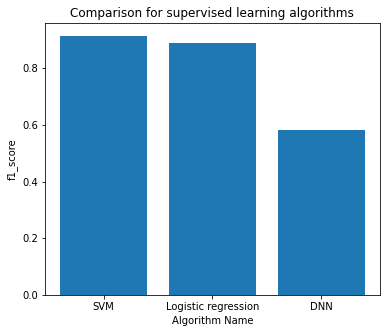

In [53]:
import matplotlib.pyplot as plt
plt.title("Comparison for supervised learning algorithms")
plt.xlabel("Algorithm Name")
plt.ylabel("f1_score")
classifiers = ['SVM', 'Logistic regression', 'DNN']
f1_scores = [svm_f1_score, logistic_regression_f1_score, DNN_f1_score]
plt.bar(classifiers,f1_scores)
plt.show()

# 3 unsupervised Learning algorithms

### 1) K-means clustering

In [261]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)


KMeans(n_clusters=2, random_state=0)

In [265]:
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

y_predict = logistic_regresssion_classifier.predict(X)
kmeans_f1_score = f1_score(y, y_predict)

target_names = ['Healthy', 'Non-Healthy']
kmeans_classification_report = classification_report(y, y_predict, target_names=target_names)

print("kmeans F1_score: ", kmeans_f1_score)
print("kmeans classification report: \n", kmeans_classification_report)

kmeans F1_score:  0.9030927835051547
kmeans classification report: 
               precision    recall  f1-score   support

     Healthy       0.95      0.97      0.96       608
 Non-Healthy       0.92      0.88      0.90       248

    accuracy                           0.95       856
   macro avg       0.94      0.93      0.93       856
weighted avg       0.94      0.95      0.94       856



### 2) SOM (Self Organizing maps)

In [266]:
!pip install sklearn-som

In [267]:
from sklearn_som.som import SOM

In [268]:
som = SOM(m=2, n=1, dim=len(X_train.columns))
som.fit(np.asarray(X))

In [269]:
y_predict = som.predict(np.asarray(X))

In [270]:
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

#y_predict = logistic_regresssion_classifier.predict(X_test)
som_f1_score = f1_score(y, y_predict)

target_names = ['Healthy', 'Non-Healthy']
som_classification_report = classification_report(y, y_predict, target_names=target_names)

print("Self Map Clustering F1_score: ", som_f1_score)
print("Self Map Clustering report: \n", som_classification_report)

Self Map Clustering F1_score:  0.3753501400560224
Self Map Clustering report: 
               precision    recall  f1-score   support

     Healthy       0.71      0.45      0.55       608
 Non-Healthy       0.29      0.54      0.38       248

    accuracy                           0.48       856
   macro avg       0.50      0.50      0.46       856
weighted avg       0.59      0.48      0.50       856



### 3) Hierarchical Clustering (Agglomerative Clustering)

In [244]:
from sklearn.cluster import AgglomerativeClustering

In [271]:
agglomerative = AgglomerativeClustering(n_clusters=2, compute_distances=True)
agglomerative.fit_predict(X)
agglomerative.n_clusters_

y_predict = agglomerative.labels_

In [272]:
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

#y_predict = logistic_regresssion_classifier.predict(X_test)
agglomerative_f1_score = f1_score(y, y_predict)

target_names = ['Healthy', 'Non-Healthy']
agglomerative_classification_report = classification_report(y, y_predict, target_names=target_names)

print("agglomerative clustering F1_score: ", agglomerative_f1_score)
print("agglomerative clustering classification report: \n", agglomerative_classification_report)

agglomerative clustering F1_score:  0.40543881334981463
agglomerative clustering classification report: 
               precision    recall  f1-score   support

     Healthy       0.72      0.35      0.47       608
 Non-Healthy       0.29      0.66      0.41       248

    accuracy                           0.44       856
   macro avg       0.50      0.50      0.44       856
weighted avg       0.59      0.44      0.45       856



In [273]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

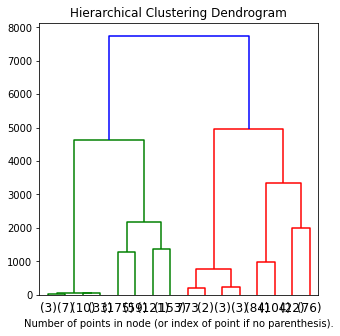

In [274]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

plt.title("Hierarchical Clustering Dendrogram")
plt.rcParams["figure.figsize"] = (5,5)
# plot the top three levels of the dendrogram
plot_dendrogram(agglomerative, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

### Comparisons for Non-supervised learning algorithms

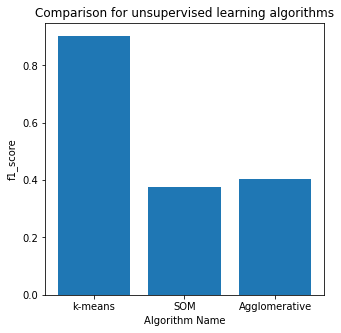

In [276]:
import matplotlib.pyplot as plt
plt.title("Comparison for unsupervised learning algorithms")
plt.xlabel("Algorithm Name")
plt.ylabel("f1_score")
classifiers = ['k-means', 'SOM', 'Agglomerative']
f1_scores = [kmeans_f1_score, som_f1_score, agglomerative_f1_score]
plt.bar(classifiers,f1_scores)
plt.show()